# 🌄 Landscape Color Enhancement 

### Import  Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

###  Load the Image

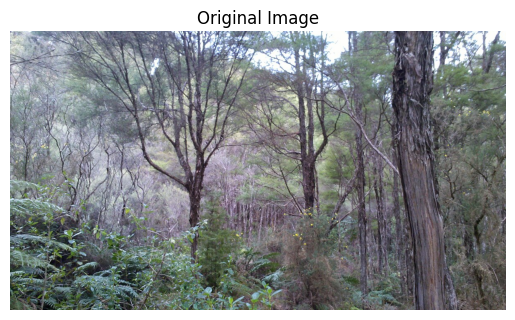

In [2]:
# Load the image
image = cv2.imread('forest.jpg')

# Convert BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

### Contrast Enhancement via Histogram Equalization

In [3]:
# This function will plot two images
def plot_image(image_1, image_2, title_1, title_2):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

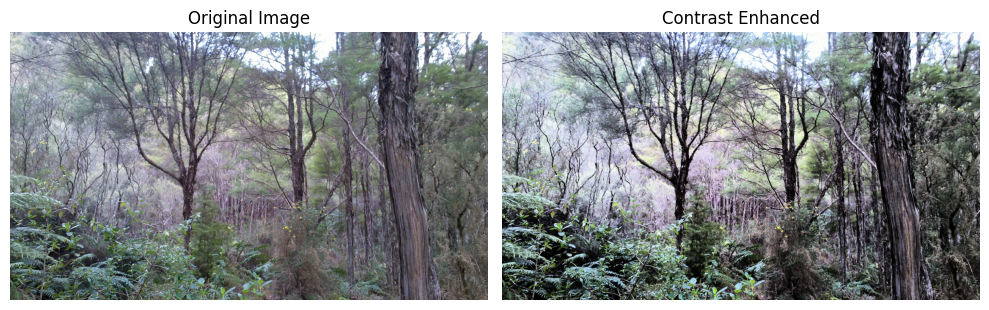

In [4]:
# Convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split HSV channels
h, s, v = cv2.split(hsv)

# Apply histogram equalization to the Value (brightness) channel
v_eq = cv2.equalizeHist(v)

# Merge modified HSV channels
hsv_contrast = cv2.merge([h, s, v_eq])

# Convert back to BGR color space
contrast_image = cv2.cvtColor(hsv_contrast, cv2.COLOR_HSV2BGR)

# Display comparison
plot_image(image, contrast_image, "Original Image", "Contrast Enhanced")

### Apply Saturation Enhancement

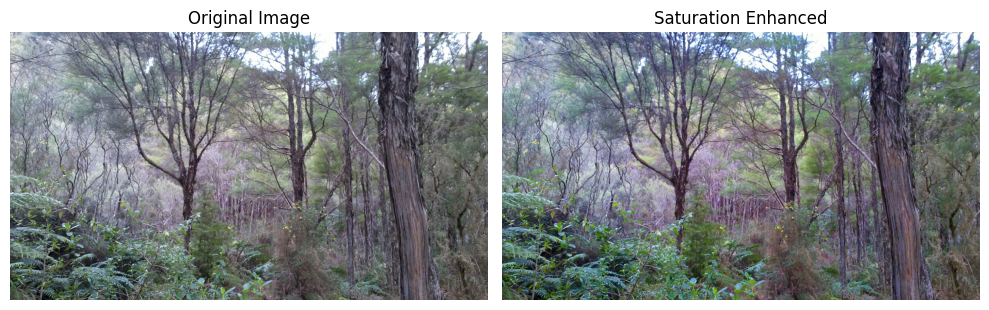

In [5]:
# Convert the original image to HSV
hsv_sat = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split HSV channels
h2, s2, v2 = cv2.split(hsv_sat)

# Increase saturation by multiplying and clipping
s2_boosted = np.clip(s2 * 1.5, 0, 255).astype(np.uint8)

# Merge boosted saturation with original H and V
hsv_saturated = cv2.merge([h2, s2_boosted, v2])

# Convert back to BGR
saturation_image = cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2BGR)

# Display comparison
plot_image(image, saturation_image, "Original Image", "Saturation Enhanced")

### Apply Both Enhancements Together (Contrast + Saturation)

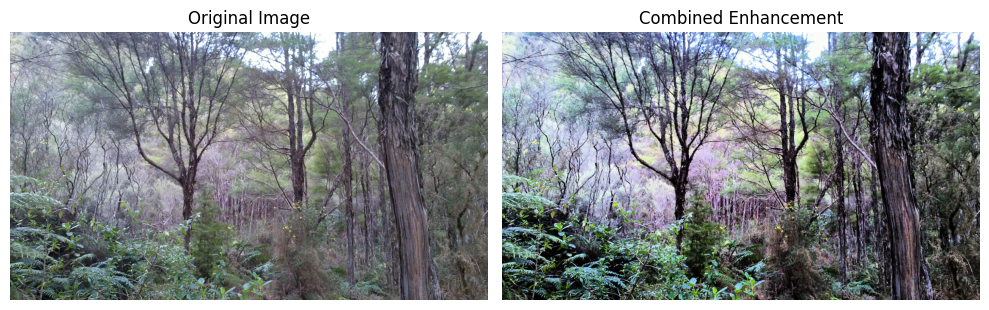

In [6]:
# Step 1: Enhance contrast
h_c, s_c, v_c = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
v_c_eq = cv2.equalizeHist(v_c)

# Step 2: Enhance saturation
s_c_boosted = np.clip(s_c * 1.5, 0, 255).astype(np.uint8)

# Merge enhanced channels
hsv_combined = cv2.merge([h_c, s_c_boosted, v_c_eq])

# Convert back to BGR
combined_image = cv2.cvtColor(hsv_combined, cv2.COLOR_HSV2BGR)

# Display original vs combined enhanced
plot_image(image, combined_image, "Original Image", "Combined Enhancement")